In [1]:
from PIL import Image, ImageDraw
import numpy as np
import copy

## Basic operations

In [2]:
# Path to image
image_path = '../data/images/000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.jpg'

# Coordinates of a bounding box from previous image
(x_min, y_min, x_max, y_max) = (178, 84, 230, 143)

# Target image size
target_size = 284

In [3]:
image = Image.open(image_path)
print(f'image format: {image.format}')
print(f'image size: {image.size}')
print(f'image mode: {image.mode}')

image format: JPEG
image size: (500, 375)
image mode: RGB


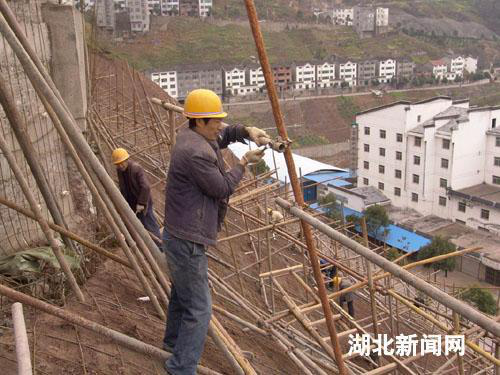

In [4]:
display(image)

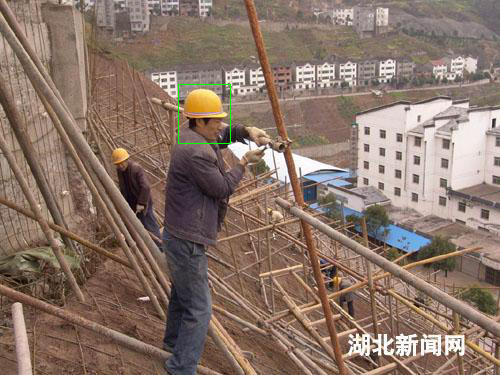

In [5]:
# Add the bounding box
image_tmp = copy.copy(image)
draw = ImageDraw.Draw(image_tmp)
draw.rectangle((x_min, y_min, x_max, y_max), outline = (0, 255, 0))
display(image_tmp)

## Scale image

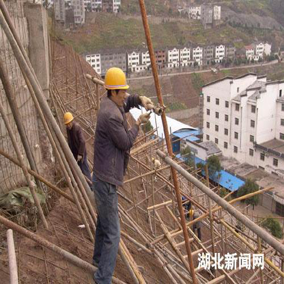

In [6]:
image_scaled = image.resize((target_size, target_size))
display(image_scaled)

## Scale bounding box

In [7]:
# Store original width and height of the image
width, height = image.size

# Compute scaled width and height
width_scale = target_size/width
height_scale = target_size/height

# Compute scaled bounding box coordinates
x_min_scale = int(np.round(x_min * width_scale))
y_min_scale = int(np.round(y_min * height_scale))
x_max_scale = int(np.round(x_max * width_scale))
y_max_scale = int(np.round(y_max * height_scale))

print(f'Scaled bounding box: {x_min_scale, y_min_scale, x_max_scale, y_max_scale}')

Scaled bounding box: (101, 64, 131, 108)


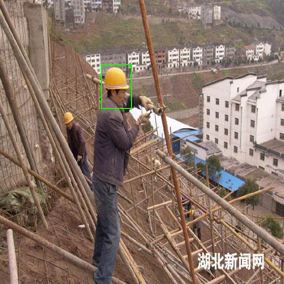

In [8]:
# Add scaled bounding box to the scaled image
image_scaled_tmp = copy.copy(image_scaled)
draw = ImageDraw.Draw(image_scaled_tmp)
draw.rectangle((x_min_scale, y_min_scale, x_max_scale, y_max_scale), outline = (0, 255, 0))
display(image_scaled_tmp)

## Alternative approach with chitra

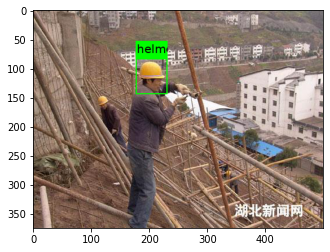

In [9]:
## Alternative approach to scale both the image and the bounding box with Chitra
from chitra.image import Chitra
import matplotlib.pyplot as plt

# Create image with bounding box
box = [[x_min, y_min, x_max, y_max]]
image = Chitra(image_path, box, 'helmet')

# Show image with bounding box
plt.imshow(image.draw_boxes())

In [10]:
# Scale bounding box automatically based on the new image size
image.resize_image_with_bbox((target_size, target_size))
print('Scaled bounding box with Chitra:', image.bboxes)

Scaled bounding box with Chitra: [BoundingBox(x1=101.1040, y1=63.6160, x2=130.6400, y2=108.2987, label=helmet)]


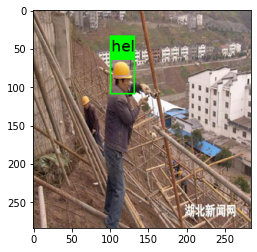

In [11]:
plt.imshow(image.draw_boxes())